# Clase 2: Tipos de Datos y Visualización

En esta clase se estudian los diferentes tipos de datos más comunes y cómo trabajar con ellos en pandas. En particular, se muestra cómo visualizarlos usando la librería _matplotlib_.


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<center>
<img src=im/type_data.jpg>
<center/>

#### Cargue la base datos de reseñas de vinos

In [2]:
vinos = pd.read_csv('winemag-data-130k-v2.csv.zip', compression = 'zip', index_col = 0) # Se puede leer directamente desde el zip. 

In [3]:
# Ejercicio opcional: ¿cómo descomprimir un archivo usando Python?

In [2]:
vinos = pd.read_csv('winemag-data-130k-v2.csv', index_col = 0) # Para que cargue con el índice

In [5]:
vinos.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [6]:
vinos['points'].dtype # Explore qué tipo de dato es el puntaje.

dtype('int64')

In [7]:
vinos.dtypes # Explore qué tipos de datos son las diferentes columnas.

country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

In [8]:
vinos.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery'],
      dtype='object')

In [9]:
vinos.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


#### Para transformar una varibale a un tipo deseado se usa:
- Para datos discretos: _astype(int)_
- Para datos continuos: _astype(float)_
- Para datos categóricos: _astype('category')_
- Para datos de texto: _astype(str)_
- Entre otros...

In [3]:
vinos['country'] = vinos['country'].astype('category') # Convierta la variable país en una variable categórica.

In [11]:
vinos['country'].dtype # Verifique que se hizo correctamente

CategoricalDtype(categories=['Argentina', 'Armenia', 'Australia', 'Austria',
                  'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada',
                  'Chile', 'China', 'Croatia', 'Cyprus', 'Czech Republic',
                  'Egypt', 'England', 'France', 'Georgia', 'Germany', 'Greece',
                  'Hungary', 'India', 'Israel', 'Italy', 'Lebanon',
                  'Luxembourg', 'Macedonia', 'Mexico', 'Moldova', 'Morocco',
                  'New Zealand', 'Peru', 'Portugal', 'Romania', 'Serbia',
                  'Slovakia', 'Slovenia', 'South Africa', 'Spain',
                  'Switzerland', 'Turkey', 'US', 'Ukraine', 'Uruguay'],
                 ordered=False)

#### Construcción de variables

1. Genere categorías de calificación de los vinos según el puntaje y usando la función _pd.cut()_.
2. Convierta esta nueva variable en variables categóricas. No tenga en cuenta una de las categorías (¿por qué?).
3. Construya una variable booleana que capture si el vino es recomedado cuando pasa cierto umbral de puntaje.


In [12]:
vinos['points'].describe() # Para explorar la distrubición de la variable y escoger puntos de corte adecuados.

count    129971.000000
mean         88.447138
std           3.039730
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

In [4]:
vinos['calificacion'] = pd.cut(vinos['points'], [80, 85, 90, 95, 100], labels = ['malo', 'regular', 'bueno', 'excelente']) # Genere las categorías con pd.cut()

In [14]:
vinos['calificacion'].dtype # Explore el tipo de datos de su variable creada

CategoricalDtype(categories=['malo', 'regular', 'bueno', 'excelente'], ordered=True)

In [15]:
pd.get_dummies(vinos, columns=['calificacion'], drop_first = True).head() # Genere las dummies sin tener en cuenta la primera categoría

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,calificacion_regular,calificacion_bueno,calificacion_excelente
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,1,0,0
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,1,0,0
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,1,0,0
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,1,0,0
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,1,0,0


In [16]:
vinos['recomendado'] = vinos['points'] >= 92 # Genere variable booleana de recomendación

In [17]:
vinos.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,calificacion,recomendado
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,regular,False
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,regular,False
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,regular,False
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,regular,False
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,regular,False


### Imputación de datos:

Consiste en asignar a los valores faltantes (_missing_) de una observación un valor determinado usando técnicas estadísticas.


In [18]:
vinos['price'].isna().head(15) # Identifique qué observaciones no cuentan con información de su precio

0      True
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13     True
14    False
Name: price, dtype: bool

In [19]:
vinos[vinos['price'].notna()].head() # Opción 1: eliminar las observaciones sin información del precio

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,calificacion,recomendado
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,regular,False
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,regular,False
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,regular,False
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,regular,False
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,regular,False


In [20]:
vinos['price'].fillna(0).head(15) # Opción 2: Darles un valor de 0

0      0.0
1     15.0
2     14.0
3     13.0
4     65.0
5     15.0
6     16.0
7     24.0
8     12.0
9     27.0
10    19.0
11    30.0
12    34.0
13     0.0
14    12.0
Name: price, dtype: float64

In [21]:
vinos['price'].fillna(vinos['price'].mean()).head(15) # Opción 3: Asignarles el precio promedio de las observaciones con esta información.

0     35.363389
1     15.000000
2     14.000000
3     13.000000
4     65.000000
5     15.000000
6     16.000000
7     24.000000
8     12.000000
9     27.000000
10    19.000000
11    30.000000
12    34.000000
13    35.363389
14    12.000000
Name: price, dtype: float64

## Análisis Exploratorio de Datos (EDA): Visualización

### Anatomía de una Figura

1. Se compone de uno o más gráficos.
2. Cada gráfico tiene propiedades que se pueden personalizar. 

<center>
<img src=im/anatomia.png>
<center/>
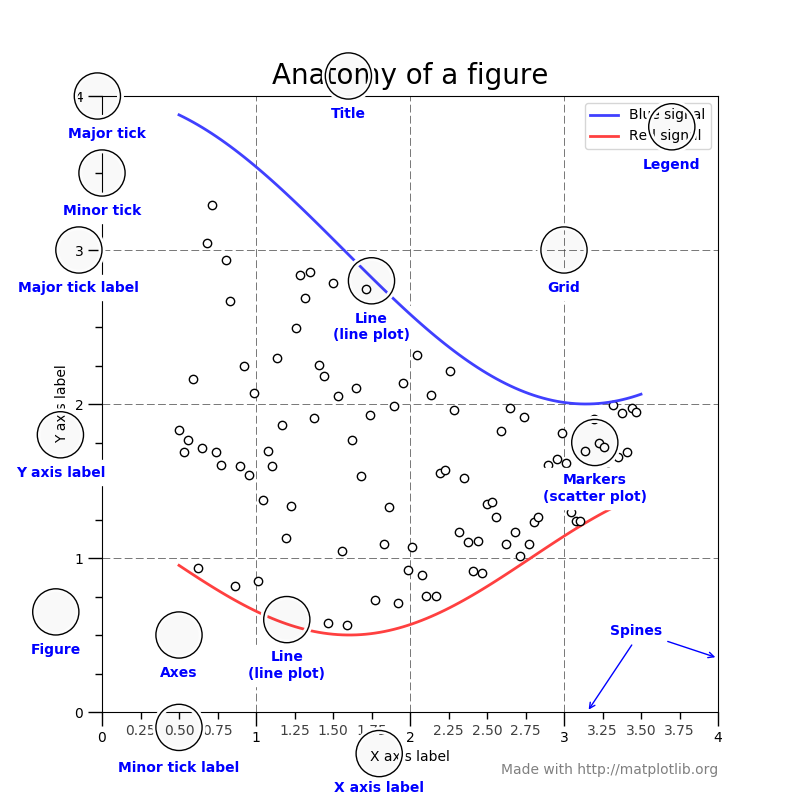

### Diferentes tipos de gráficos según tipos de las variables y el tipo de preguntas que se desean responder

<center>
<img src=im/comparison2.PNG>
<center/>
    
Fuente: _Datanest_

#### Gráfico de línea

Se usa para presentar relaciones entre dos variables numéricas, típicamente continuas. Usualmente se usa para visualizar el comportamiento de una variable a través del tiempo, e.g. PIB, Inflación, Tasas de interés, Precios de acciones, Resultados financieros.

In [22]:
google = pd.read_csv('GOOG.csv', header=None, delimiter=',') # Cargue las información del precio de la acción de Google
google.columns = ['Fecha','Precio']

In [23]:
google['Fecha'] = pd.to_datetime(google['Fecha'], format='%d-%m-%Y') # Transforme la columna de fecha a formato fecha usando pd.to_datetime 

In [24]:
google = google.set_index('Fecha') # Asigne la variable fecha como el índice del data frame

C:\Users\Mateo\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


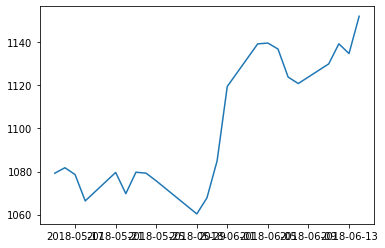

In [25]:
plt.plot(google); # Graficar con Matplotlib

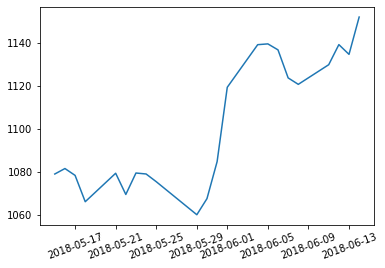

In [26]:
plt.plot(google)
plt.xticks(rotation=20); # Dé formato al gráfico

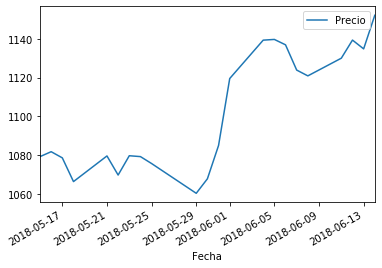

In [27]:
google.plot(); # Grafique directamente

<center>
<img src=im/comparison1.PNG>
<center/>
    
Fuente: _Datanest_

#### Gráfico de barras

Se utiliza para comparar diferentes categorías de variable.

In [11]:
paises = vinos.groupby('country').size() # Genere una pandas.Series con el número de vinos por país en la base de datos.

In [29]:
paises.head()

country
Argentina                 3800
Armenia                      2
Australia                 2329
Austria                   3345
Bosnia and Herzegovina       2
dtype: int64

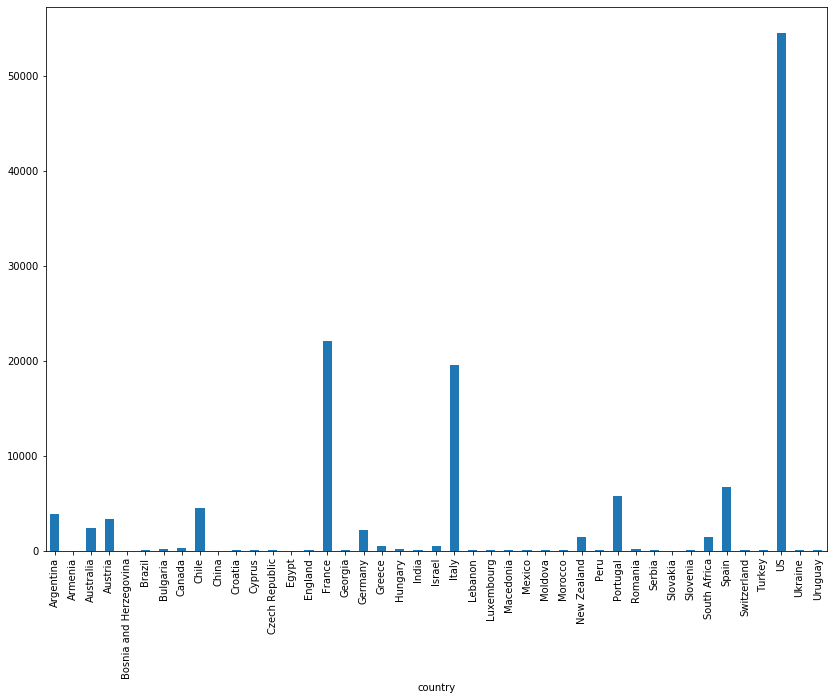

In [30]:
paises.plot(kind = 'bar', figsize = (14,10)); # Grafique directamente

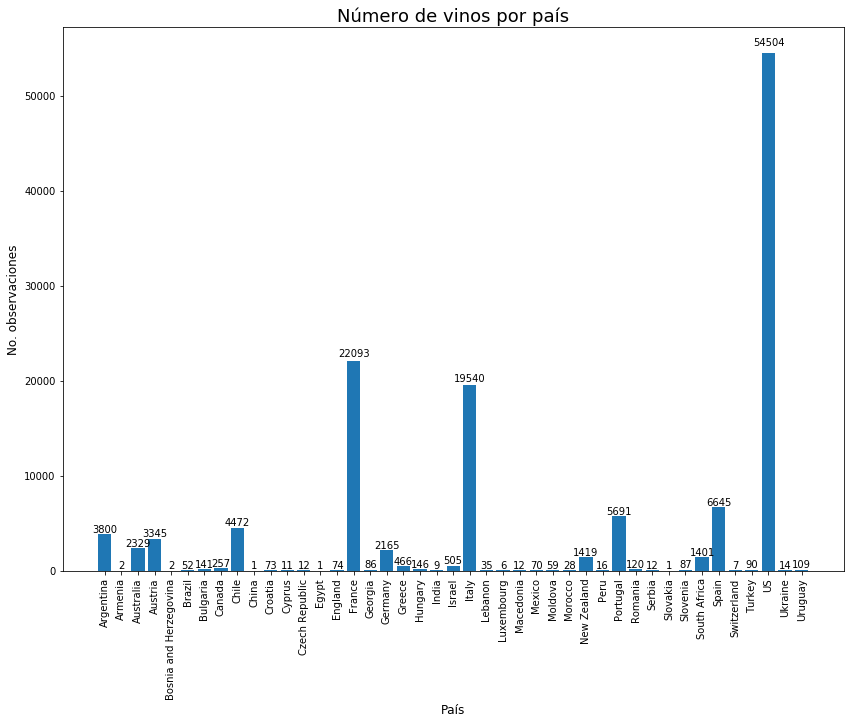

In [31]:
fig, ax = plt.subplots(figsize = (14,10)) # Tamaño de la figura

plot = ax.bar(paises.index, paises.values) # Gráfico de barras con los datos obtenidos
plt.xticks(rotation=90) # Formato 

plt.xlabel('País', fontsize = 12) # Nombre del eje x
plt.ylabel('No. observaciones', fontsize = 12) # Nombre del eje y
plt.title('Número de vinos por país', fontsize = 18) # Titulo del gráfico

for barra in plot: # Anotación del valor de cada barra
    altura = barra.get_height()
    ax.text(barra.get_x() + barra.get_width()/2, 1.01*altura, int(altura), ha='center', va='bottom');

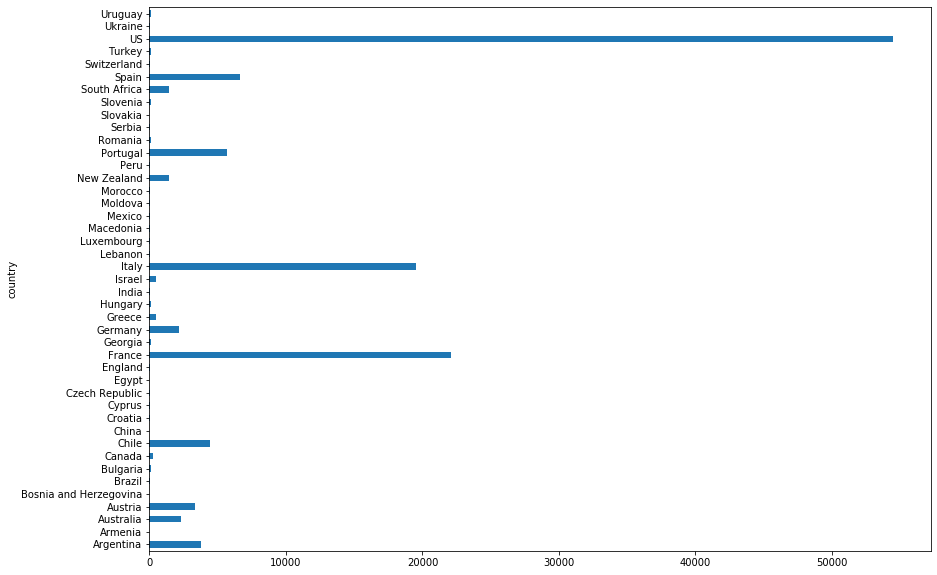

In [32]:
paises.plot(kind = 'barh', figsize = (14,10)); # Grafique ahora con barras horizontales

<center>
<img src=im/composition1.PNG>
<center/>
    
Fuente: _Datanest_

#### Gráfico de pie

Se utiliza pra representar la contribución de diferenes categorías/grupos a un total. Por ejemplo, Contribución de cada departamento al PIB nacional, Categorías de productos compradas por los clientes.

In [6]:
calificacion = vinos['calificacion'].value_counts(normalize = True) # Calcule el porcentaje que representa cada categoría de clasificación construida sobre el total.

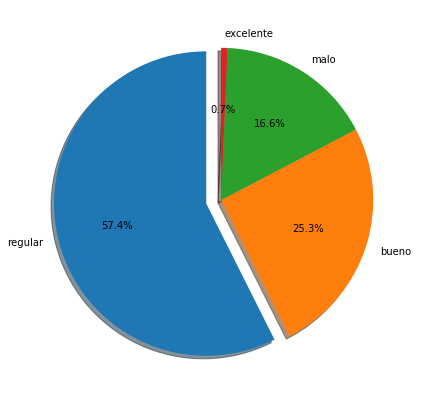

In [5]:
fig1, ax1 = plt.subplots(figsize = (7, 7)) # Genere la Figura

ax1.pie(calificacion, explode = (0.1, 0, 0, 0), labels = calificacion.index, autopct = '%1.1f%%', shadow = True, startangle = 90); # Gráfico de Pie

<center>
<img src=im/composition2.PNG>
<center/>
    
Fuente: _Datanest_

In [35]:
# Cramos una base de datos artificial de ventas de diferentes tipos de productos

x = np.array([1, 2, 3, 4, 5, 6])
Apr = [5, 7, 6, 8, 7, 9]
May = [0, 4, 3, 7, 8, 9]
June = [6, 7, 4, 5, 6, 8]

labels = ["Abril ", "Mayo", "Junio"]

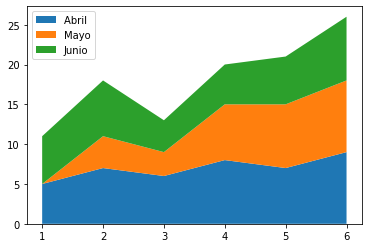

In [36]:
fig, ax = plt.subplots()

ax.stackplot(x, Apr, May, June, labels=labels) # Gráfico de área acumulada
ax.legend(loc=2);

<center>
<img src=im/distribution.PNG>
<center/>
    
Fuente: _Datanest_

### Histograma

Se utilizan para estudiar la distribución de una variable continua, a partir de dividir el rango de la variable ([min, max]) en un número de grupos (bins) y se grafica el número de observaciones en cada uno de estos grupos.

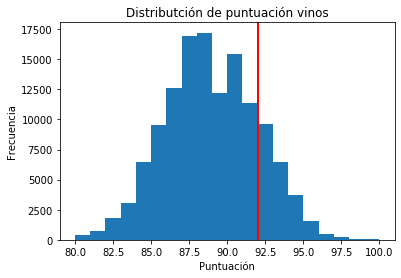

In [37]:
# Histograma de la puntuación de los vinos combinando grafico directo de pandas y Matplotlib para formato
vinos['points'].plot.hist(bins = 20)

plt.xlabel("Puntuación")
plt.ylabel("Frecuencia")
plt.title("Distributción de puntuación vinos")

plt.axvline(x = 92, linewidth=2, color = 'r'); # Linea vertical en el umbral de recomendación

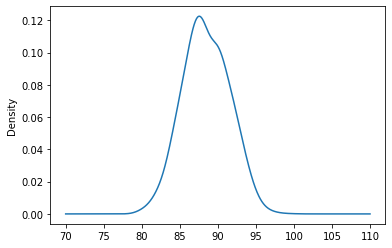

In [38]:
vinos['points'].plot.kde(bw_method = 0.3); # Gráfico de estimación de densidad de kernel

### Box Plot (Gráfico de cajas y bigotes)

Se usa para ver la distribución de una variable a través de diferentes categorías. Pinta una caja con el 1er (25), el 2do (50) y el 3er (75) quartil, y bigotes arriba y abajo de la caja a 1.5*IQR (rango inter-quantil, distancia entre el 3ro y el 1er quartil). Si no hay _outliers_ los bigotes se pintan en el máximo y el mínimo.

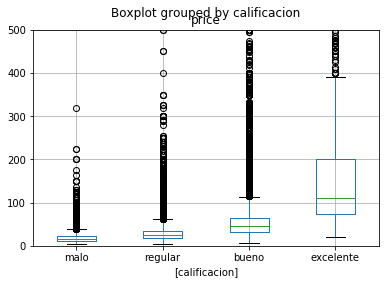

In [39]:
vinos[['price', 'calificacion']].boxplot(by = 'calificacion') # Gráfico de cajas y bigotes de la distribución de precios por categoría de clasificación
plt.ylim(0, 500); # Formato para ver mejor los datos

<center>
<img src=im/relation.PNG>
<center/>
    
Fuente: _Datanest_

#### Gráfico de dispersión (Scatter plot)

Utilizado para estudiar visualmente si existe una relación entre dos variables. Como prácticamente solo podemos graficar 2 dimensiones, se puede incluir más información de los datos jugando con su forma, tamaño, color, entre otros.

In [15]:
vinos_sample = vinos.sample(5000) # Creamos un subconjunto aleatorio de 5000 observaciones de la base de datos original

In [16]:
vinos_sample['price'] = vinos_sample['price'].fillna(vinos_sample['price'].mean())
vinos_sample['points'] = vinos_sample['points'].fillna(vinos_sample['points'].mean())

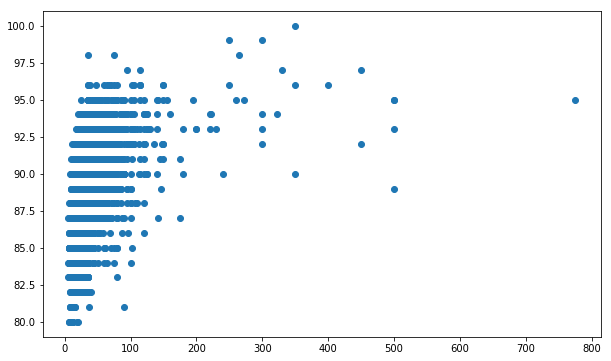

In [20]:
plt.figure(figsize = (10, 6))

x = vinos_sample['price']
y = vinos_sample['points']

plt.scatter(x, y); # Gráfico de dispersión

In [17]:
vinos_sample['taster_name'] = vinos_sample['taster_name'].astype('category') # Creamos la categoría del crítico para agregarlo al gráfico

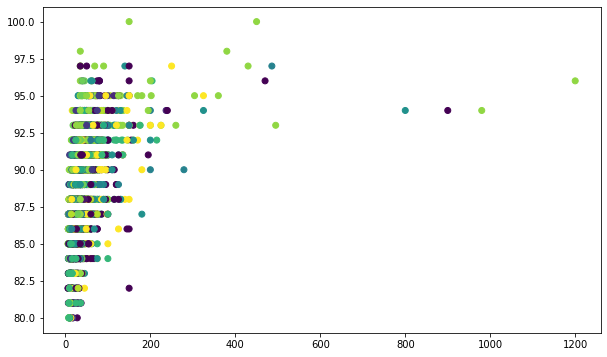

In [51]:
plt.figure(figsize = (10, 6))

plt.scatter(x, y, c = vinos_sample['taster_name'].cat.codes); # Para pasarlo a la función para que pinte los colores según la variable del crítico se tiene que pasar numéricamente, esto se hace con cat.codes

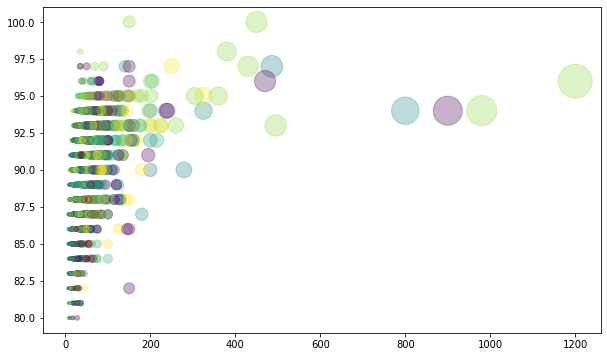

In [59]:
plt.figure(figsize = (10, 6))

plt.scatter(x, y, c = vinos_sample['taster_name'].cat.codes, s = 0.01*x*y, alpha = 0.3); # El tamaño de los puntos se da por el argumento s y la transparencia por alpha

### Gráficos interactivos usando _plotly_

In [5]:
import plotly.graph_objs as go

In [6]:
calificacion = vinos['calificacion'].value_counts()

In [7]:
calificacion

regular      74376
bueno        32754
malo         21563
excelente      881
Name: calificacion, dtype: int64

In [8]:
fig = go.Figure(data=[go.Pie(labels = calificacion.index, values = calificacion.values)])
fig.show(renderer='browser')

In [12]:
paises.tail()

country
Switzerland        7
Turkey            90
US             54504
Ukraine           14
Uruguay          109
dtype: int64

In [13]:
fig2 = go.Figure(
    data = [go.Bar(x = paises.index, y = paises.values)],
    layout_title_text = 'Vinos por país'
)
fig2.show(renderer='browser')

In [14]:
import plotly.express as px

In [18]:
vinos_sample = vinos_sample[vinos_sample['taster_name'].notna()]

In [21]:
vinos_sample['valor'] = 0.01*x*y

In [22]:
fig3 = px.scatter(vinos_sample, x = 'price', y = 'points', color = 'taster_name', size = 'valor', opacity = 0.4)
fig3.show(renderer='browser')